In [1]:
%pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# import plotly.express as px

In [3]:
df = pd.read_csv("../data/temp_electricity.csv")

In [4]:
df.head()

Datetime  Consommation               Regions               Nature  year  \
0  2020-01-01      403787.0  Auvergne-Rhône-Alpes  Données définitives  2020   
1  2020-01-02      443531.0  Auvergne-Rhône-Alpes  Données définitives  2020   
2  2020-01-03      434626.0  Auvergne-Rhône-Alpes  Données définitives  2020   
3  2020-01-04      395169.0  Auvergne-Rhône-Alpes  Données définitives  2020   
4  2020-01-05      400169.0  Auvergne-Rhône-Alpes  Données définitives  2020   

   month  day  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  GWETROOT  ...      PS  \
0      1    1              5.494              6.860     0.768  ...  97.706   
1      1    2              4.532              6.448     0.768  ...  97.484   
2      1    3              3.846              6.454     0.766  ...  97.456   
3      1    4              4.684              7.002     0.766  ...  97.844   
4      1    5              6.516              7.210     0.766  ...  97.850   

    QV2M    RH2M    T2M  T2M_MAX  T2M_MIN  T2M_RANGE   WD10M  WS10M   WS2M  
0  3.690  87.752  0.940    4.552   -0.758      5.310  291.10  1.938  1.168  
1  4.194  87.350  2.642    7.794   -0.600      8.394  175.38  3.454  2.140  
2  4.872  89.086  4.570    8.598    1.944      6.654  196.00  2.976  1.748  
3  4.846  94.106  3.732    7.036   -0.244      7.280  276.04  3.874  2.512  
4  3.932  91.162  1.246    5.364   -1.542      6.906  236.76  3.654  2.338  

[5 rows x 22 columns]

In [5]:
df.columns

Index(['Datetime', 'Consommation', 'Regions', 'Nature', 'year', 'month', 'day',
       'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'GWETROOT', 'GWETTOP',
       'PRECTOTCORR', 'PS', 'QV2M', 'RH2M', 'T2M', 'T2M_MAX', 'T2M_MIN',
       'T2M_RANGE', 'WD10M', 'WS10M', 'WS2M'],
      dtype='object')

### Data Cleaning and Preprocessing 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21924 entries, 0 to 21923
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Datetime           21924 non-null  object 
 1   Consommation       21924 non-null  float64
 2   Regions            21924 non-null  object 
 3   Nature             21924 non-null  object 
 4   year               21924 non-null  int64  
 5   month              21924 non-null  int64  
 6   day                21924 non-null  int64  
 7   ALLSKY_SFC_SW_DWN  21924 non-null  float64
 8   CLRSKY_SFC_SW_DWN  21924 non-null  float64
 9   GWETROOT           21924 non-null  float64
 10  GWETTOP            21924 non-null  float64
 11  PRECTOTCORR        21924 non-null  float64
 12  PS                 21924 non-null  float64
 13  QV2M               21924 non-null  float64
 14  RH2M               21924 non-null  float64
 15  T2M                21924 non-null  float64
 16  T2M_MAX            219

<Axes: >

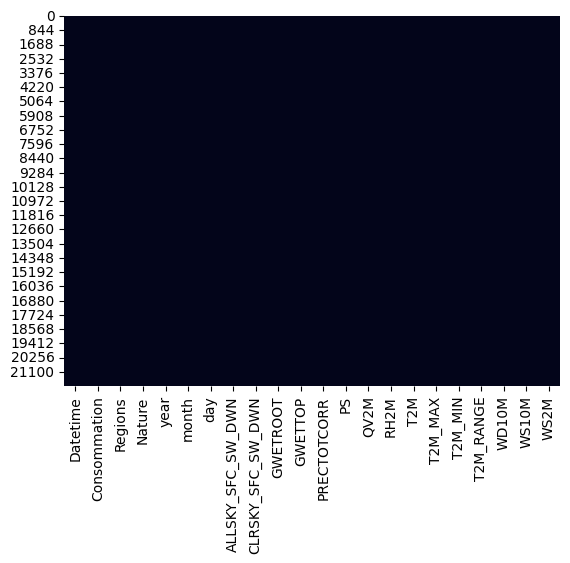

In [7]:
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

df["year"] = df["Datetime"].dt.year
df["month"] = df["Datetime"].dt.month
df["dayofweek"] = df["Datetime"].dt.dayofweek  # 0=Mon
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)

In [9]:
df[["Consommation","T2M","T2M_MAX","ALLSKY_SFC_SW_DWN","T2M_MIN","PRECTOTCORR","RH2M","WD10M","PS","WS10M"]].describe()

Consommation           T2M       T2M_MAX  ALLSKY_SFC_SW_DWN  \
count   21924.000000  21924.000000  21924.000000       21924.000000   
mean   204433.967843     12.442940     16.998125          12.961568   
std     94293.008281      6.667029      7.493208           7.852625   
min     58376.000000     -6.362000     -2.690000           0.700000   
25%    125892.500000      7.517500     11.288000           5.876000   
50%    191000.500000     12.108000     16.614000          12.028000   
75%    262712.500000     17.610500     22.530500          19.176000   
max    624804.000000     32.044000     41.378000          31.250000   

            T2M_MIN   PRECTOTCORR          RH2M         WD10M            PS  \
count  21924.000000  21924.000000  21924.000000  21924.000000  21924.000000   
mean       8.255299      2.075674     79.604627    193.231263     99.084231   
std        5.905712      3.444000     11.288745     84.581202      1.838204   
min      -10.242000      0.000000     29.186000      2.560000     93.032000   
25%        4.034000      0.058000     72.921500    133.655000     97.451500   
50%        8.176000      0.508000     81.229000    209.620000     99.500000   
75%       12.754000      2.678000     88.384000    256.380000    100.578000   
max       25.024000     54.108000     99.096000    358.400000    103.672000   

              WS10M  
count  21924.000000  
mean       4.382351  
std        1.942625  
min        0.996000  
25%        2.933500  
50%        3.960000  
75%        5.418000  
max       15.700000

#### Commentaire 


#### Consumption by region 

In [10]:
df.groupby("Regions")[["Consommation", "T2M"]].describe()

Consommation                                         \
                               count           mean           std       min   
Regions                                                                       
Auvergne-Rhône-Alpes          1827.0  342596.859880  64746.136845  234684.0   
Bourgogne-Franche-Comté       1827.0  109851.909141  22470.589562   67161.0   
Bretagne                      1827.0  119285.205802  27838.740250   72725.0   
Centre-Val de Loire           1827.0   97308.937603  22967.548838   58376.0   
Grand-Est                     1827.0  234006.535851  42286.268818  154087.0   
Hauts-de-France               1827.0  258629.059661  42353.482796  144157.0   
Ile-de-France                 1827.0  359618.373837  82920.332118  216397.0   
Normandie                     1827.0  144454.072797  30962.329042   64669.0   
Nouvelle-Aquitaine            1827.0  228669.166940  47832.733907  156845.0   
Occitanie                     1827.0  201205.998358  41757.643674  137804.0   
PACA                          1827.0  215320.491516  35987.132874  128984.0   
Pays-de-la-Loire              1827.0  142261.002737  33549.924484   58845.0   

                                                                    T2M  \
                              25%       50%       75%       max   count   
Regions                                                                   
Auvergne-Rhône-Alpes     297004.0  321116.0  388601.0  532256.0  1827.0   
Bourgogne-Franche-Comté   94505.5  103790.0  125636.0  176522.0  1827.0   
Bretagne                 100457.5  109461.0  139713.0  230009.0  1827.0   
Centre-Val de Loire       79503.5   89968.0  113728.5  174310.0  1827.0   
Grand-Est                203241.0  224851.0  263915.0  358770.0  1827.0   
Hauts-de-France          227054.0  248745.0  289640.0  397412.0  1827.0   
Ile-de-France            294165.0  336197.0  419749.5  624804.0  1827.0   
Normandie                120594.5  136120.0  167809.0  281907.0  1827.0   
Nouvelle-Aquitaine       193791.0  210637.0  260424.0  396253.0  1827.0   
Occitanie                169991.0  187339.0  227507.0  364705.0  1827.0   
PACA                     187152.0  205260.0  238816.0  346351.0  1827.0   
Pays-de-la-Loire         120918.0  131634.0  164698.5  261579.0  1827.0   

                                                                            \
                              mean       std    min    25%     50%     75%   
Regions                                                                      
Auvergne-Rhône-Alpes     11.899557  7.690190 -5.580  5.643  11.550  18.154   
Bourgogne-Franche-Comté  11.335125  7.254134 -6.326  5.725  10.954  17.306   
Bretagne                 12.599182  5.174079 -1.970  8.889  12.402  16.727   
Centre-Val de Loire      12.368478  6.848619 -4.312  7.344  12.054  17.843   
Grand-Est                10.931642  7.193575 -6.362  5.439  10.556  16.942   
Hauts-de-France          11.290617  5.834509 -5.072  6.973  11.114  16.193   
Ile-de-France            11.823184  6.562364 -5.264  6.934  11.574  17.182   
Normandie                11.997681  5.437600 -2.726  7.920  11.770  16.371   
Nouvelle-Aquitaine       13.630246  6.809904 -2.230  8.476  13.222  19.118   
Occitanie                14.089305  6.761375 -2.768  8.641  13.422  19.599   
PACA                     14.610134  6.673333  0.494  9.020  13.760  20.429   
Pays-de-la-Loire         12.740125  6.206247 -3.046  8.316  12.556  17.673   

                                 
                            max  
Regions                          
Auvergne-Rhône-Alpes     30.648  
Bourgogne-Franche-Comté  28.456  
Bretagne                 28.590  
Centre-Val de Loire      30.280  
Grand-Est                27.552  
Hauts-de-France          25.956  
Ile-de-France            29.552  
Normandie                26.766  
Nouvelle-Aquitaine       32.044  
Occitanie                31.172  
PACA                     29.672  
Pays-de-la-Loire         30.508

## Visualization 


### Daily trend

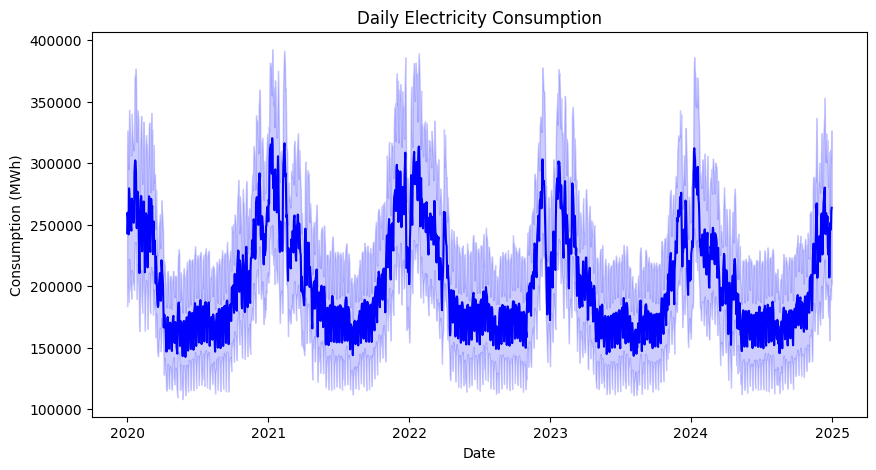

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Datetime", y="Consommation", color='blue')
plt.title("Daily Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (MWh)")
plt.show()

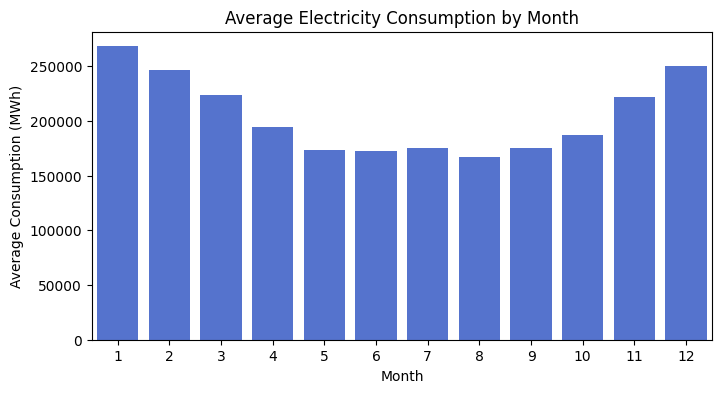

In [12]:
monthly_avg = df.groupby("month")["Consommation"].mean()
plt.figure(figsize=(8,4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, color="royalblue")
plt.title("Average Electricity Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Average Consumption (MWh)")
plt.show()

### Relationship between temperature and consumption

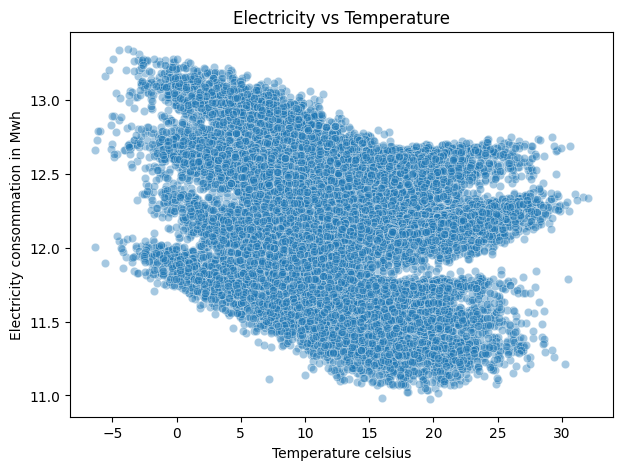

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="T2M",y=np.log(df["Consommation"]),alpha = 0.4)
plt.title("Electricity vs Temperature")
plt.xlabel("Temperature celsius")
plt.ylabel("Electricity consommation in Mwh")
plt.show()

### Regional comparison 

In [14]:
# plt.figure(figsize=(10,5))
# region_mean = df.groupby("Regions")["Consommation"].mean().sort_values(ascending=False)
# sns.barplot(x=region_mean.index, y=region_mean.values, palette="viridis")
# plt.xticks(rotation=45)
# plt.title("Average Consumption by Regions")
# plt.ylabel("Mean Daily Consumption Mwh")
# plt.xlabel("Regions in France")
# plt.show()


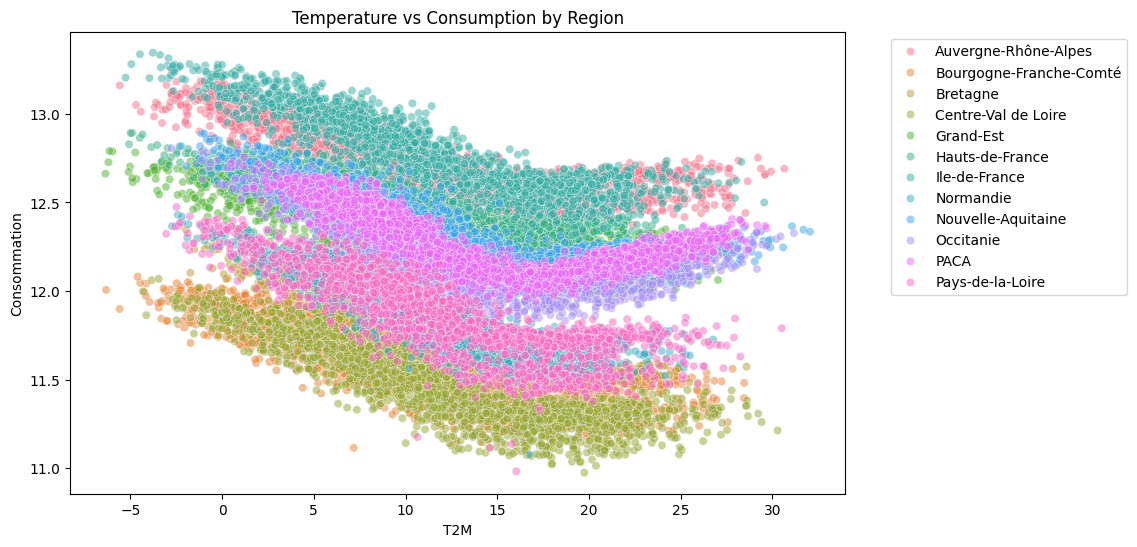

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="T2M", y=np.log(df["Consommation"]), hue="Regions", data=df, alpha=0.5)
plt.title("Temperature vs Consumption by Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Solar Radiation and Consommation

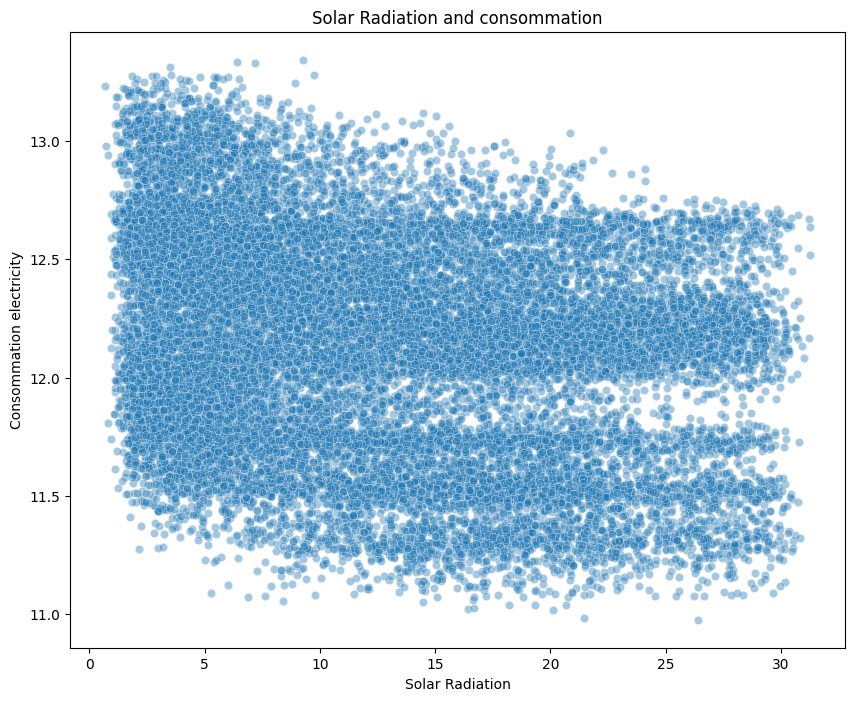

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x ="ALLSKY_SFC_SW_DWN", y = np.log(df["Consommation"]), alpha = 0.4)
plt.title("Solar Radiation and consommation")
plt.xlabel("Solar Radiation")
plt.ylabel("Consommation electricity")
plt.show()

### Humidity vs consommation

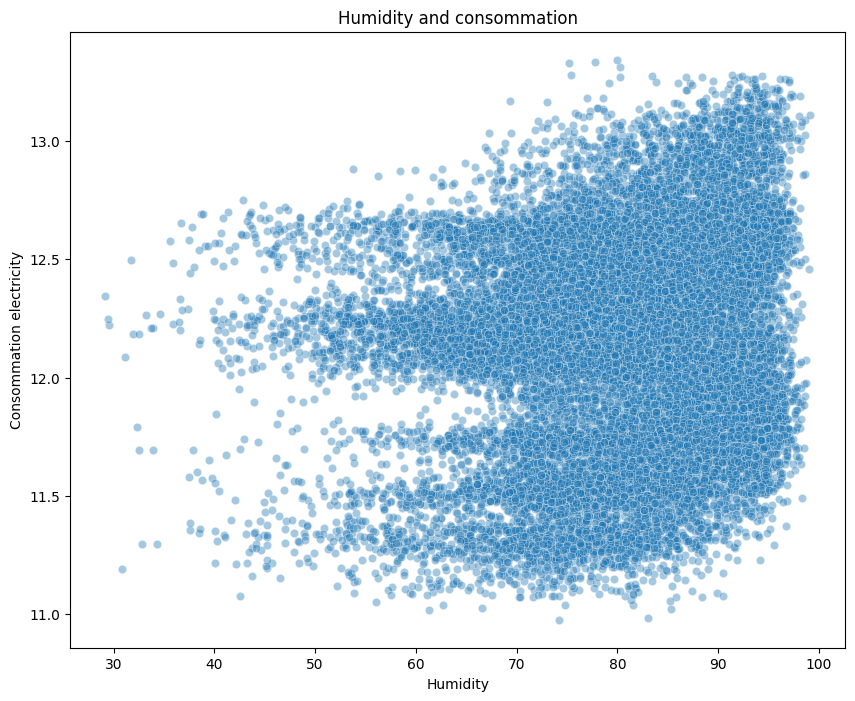

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x ="RH2M", y = np.log(df["Consommation"]), alpha = 0.4)
plt.title("Humidity and consommation")
plt.xlabel("Humidity")
plt.ylabel("Consommation electricity")
plt.show()

In [18]:
labels = {
    "T2M": "Temperature (°C)",
    "RH2M": "Humidity (%)",
    "WS10M": "Wind Speed (m/s)",
    "ALLSKY_SFC_SW_DWN": "Solar Radiation (W/m²)",
    "PRECTOTCORR": "Precipitation (mm/day)",
    "PS":"Pressure"
}


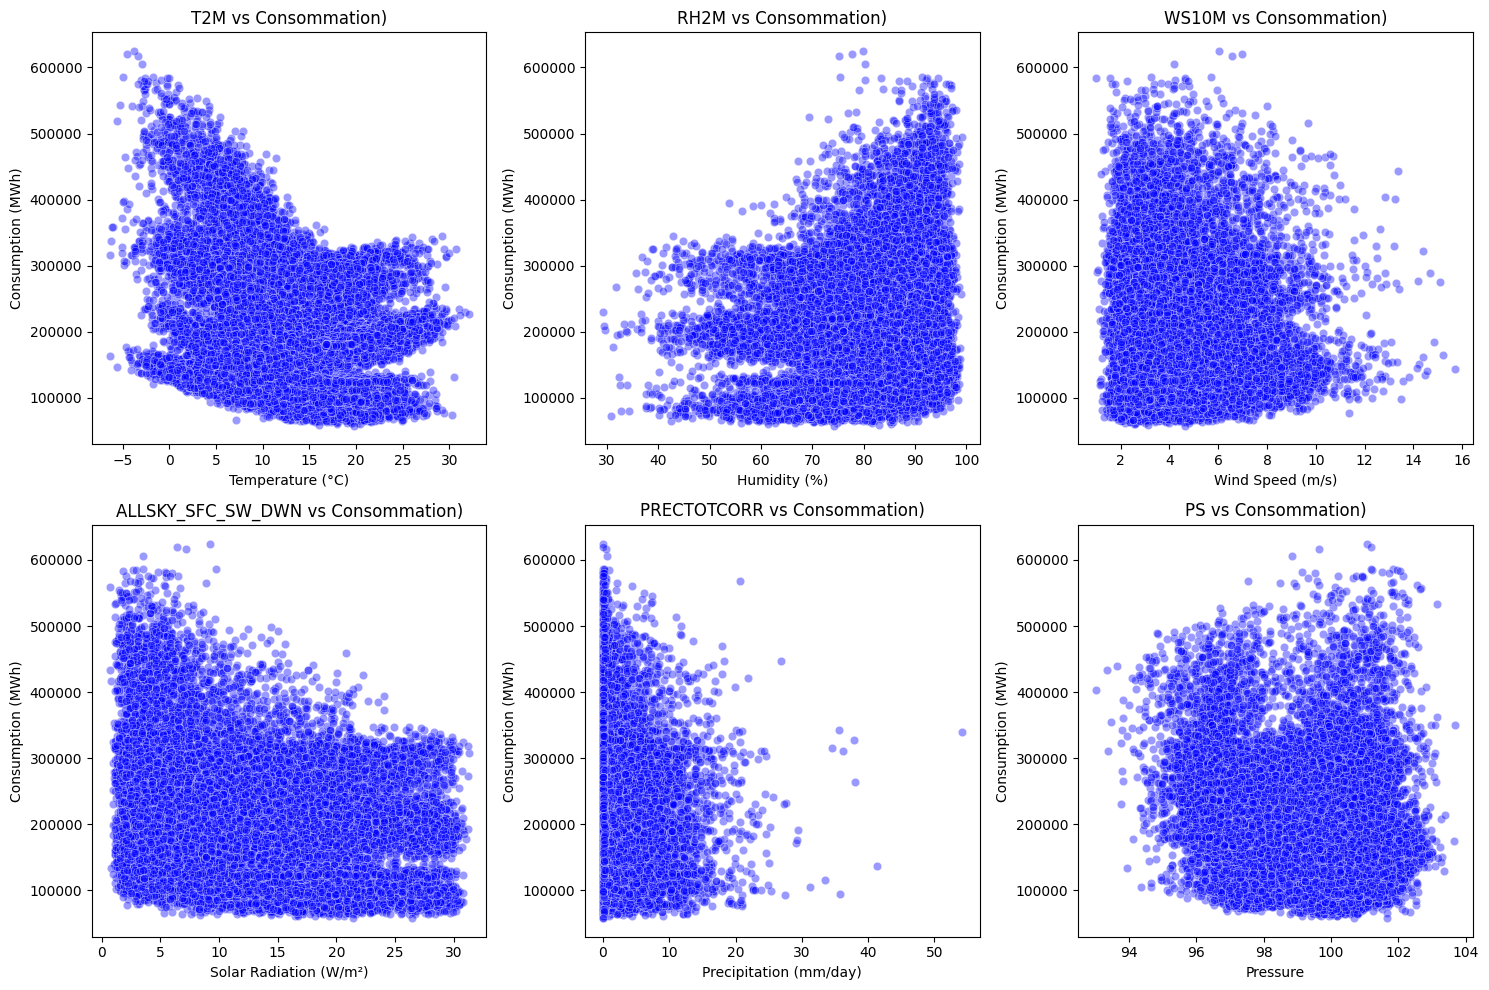

In [19]:
weather_vars = ["T2M", "RH2M", "WS10M", "ALLSKY_SFC_SW_DWN", "PRECTOTCORR","PS"]
plt.figure(figsize=(15, 10))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=var, y="Consommation", alpha=0.4, color='blue')
    plt.title(f"{var} vs Consommation)")
    plt.xlabel(labels.get(var, var))
    plt.ylabel("Consumption (MWh)")

plt.tight_layout()
plt.show()


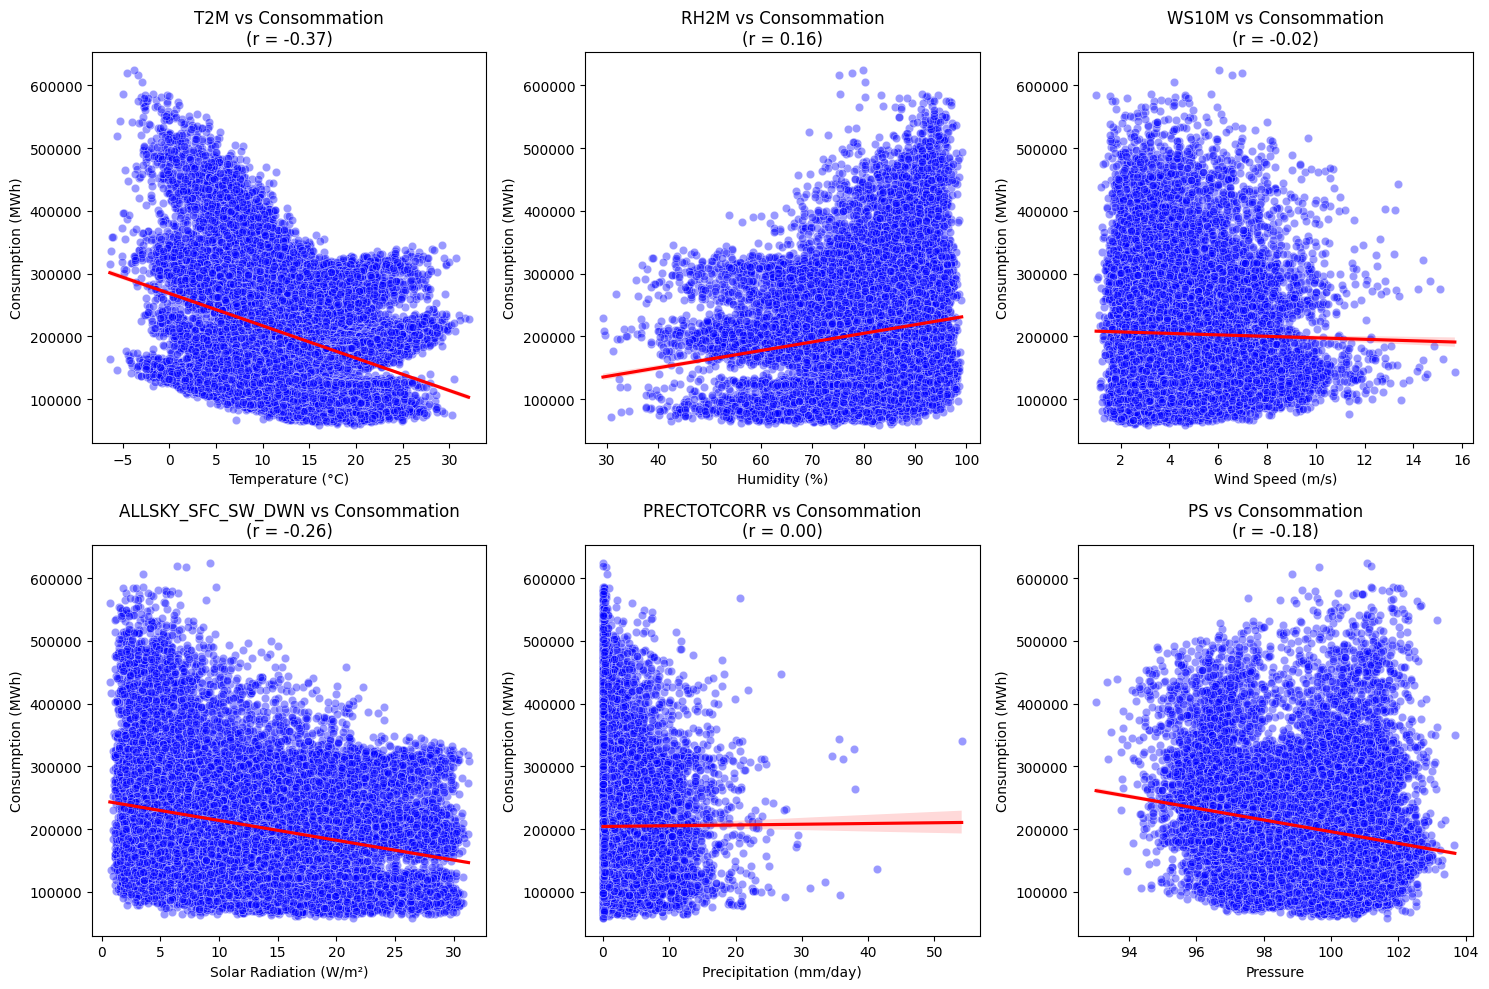

In [20]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 3, i)
    corr = df["Consommation"].corr(df[var])
    
    sns.scatterplot(data=df, x=var, y="Consommation", alpha=0.4, color='blue')
    sns.regplot(data=df, x=var, y="Consommation", scatter=False, color='red')
    
    plt.title(f"{var} vs Consommation\n(r = {corr:.2f})")
    plt.xlabel(labels.get(var, var))
    plt.ylabel("Consumption (MWh)")

plt.tight_layout()
plt.show()


### Regional comparison

### Mean comparison by regions

/tmp/ipykernel_26816/1455838715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")


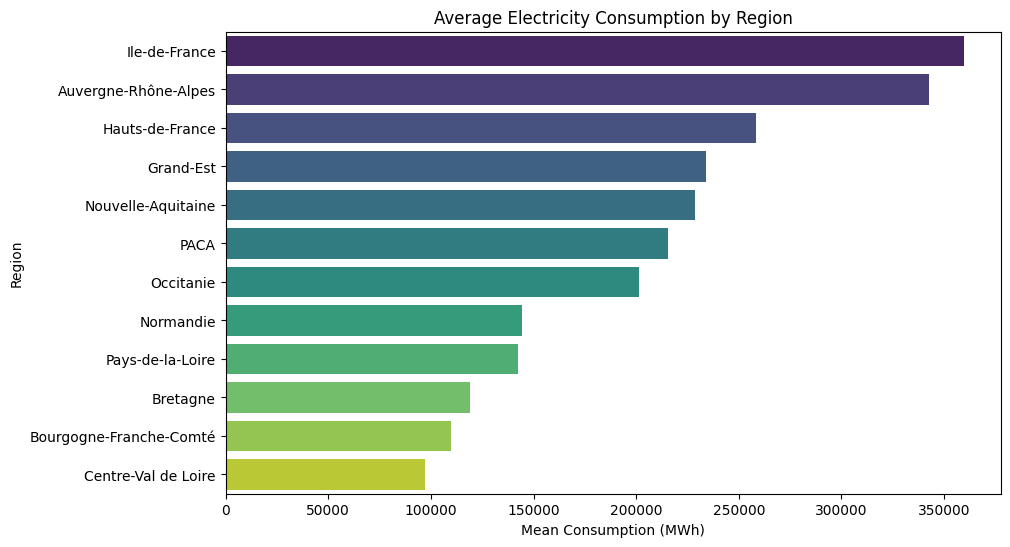

In [21]:
region_mean = df.groupby("Regions")["Consommation"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_mean.values, y=region_mean.index, palette="viridis")
plt.title("Average Electricity Consumption by Region")
plt.xlabel("Mean Consumption (MWh)")
plt.ylabel("Region")
plt.show()


/tmp/ipykernel_26816/2395323793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Regions", y="T2M", palette="coolwarm")


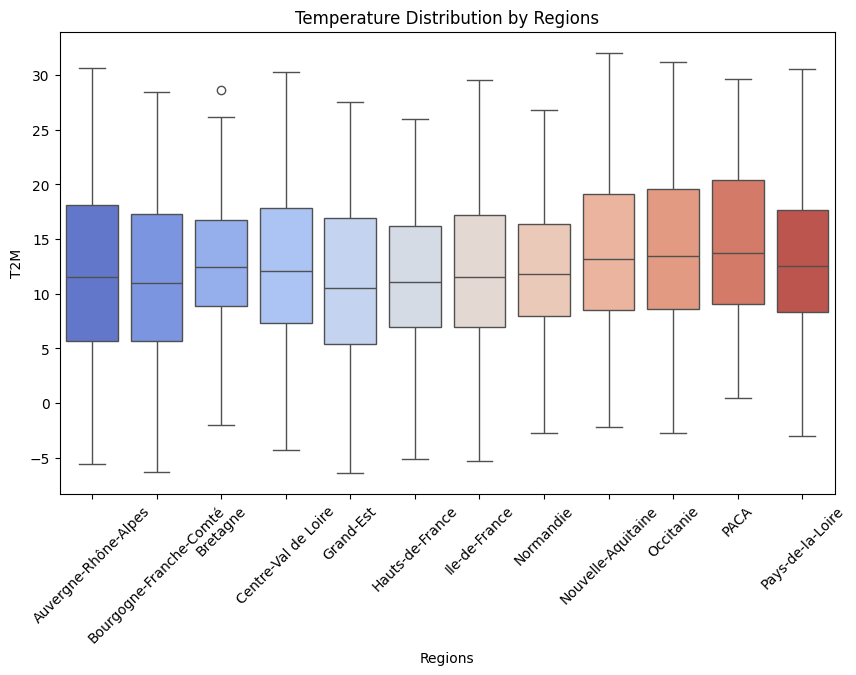

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Regions", y="T2M", palette="coolwarm")
plt.title("Temperature Distribution by Regions")
plt.xticks(rotation=45)
plt.show()


### Methodological note on interpretation

The regression models estimated in this study aim to quantify the statistical relationship between daily temperature and electricity consumption. Following standard econometric theory, the estimated coefficients should be interpreted as conditional associations rather than strict causal effects. Temperature is not randomly assigned, and other region-specific factors such as population size, economic activity, and building characteristics may also influence electricity demand.

As a result, the regression results capture how electricity consumption varies with temperature within regions and over time, but they do not isolate a pure causal effect of temperature in the policy sense.



# 📊 Descriptive Statistics: Electricity Consumption and Temperature in France (2020–2024)

## 1. Overview of Key Variables

We analyze two main variables across the 12 metropolitan regions of France:

- **Electricity consumption** (`Consommation`, in MWh)  
- **Daily mean temperature** (`T2M`, in °C), sourced from the NASA POWER API  

The dataset forms a daily panel from **2020 to 2024**, totaling **21,924 observations**.

---

## 2. National-Level Descriptive Statistics

### **Electricity Consumption (All Regions Pooled)**

| Statistic | Value |
|----------|--------|
| Count | 21,924 |
| Mean | ~204,434 MWh |
| Standard Deviation | ~94,293 MWh |
| Minimum | 58,376 MWh |
| Maximum | 624,804 MWh |

**Interpretation:**  
Daily consumption varies greatly across the dataset. The difference between the minimum and maximum values reflects substantial seasonal fluctuations, with peaks typically occurring in winter due to heating demand.

---

### **Daily Mean Temperature (All Regions Pooled)**

| Statistic | Value |
|----------|--------|
| Mean | ~12.0°C |
| Standard Deviation | ~6.9°C |
| Minimum | –8.0°C |
| Maximum | 33.3°C |

**Interpretation:**  
France experiences a wide range of temperatures, from very cold winter conditions to intense summer heat. This broad variability is useful for examining how temperature affects electricity demand.

---

## 3. Regional Descriptive Statistics

Descriptive statistics by region highlight both climatic and consumption differences across France.

### **Electricity Consumption by Region**

- **Regions with the highest average consumption:**  
  - Île-de-France (~360,000 MWh/day)  
  - Hauts-de-France  
  - Grand-Est  
  - Auvergne-Rhône-Alpes  
  These regions are larger and experience colder winters, which increases energy demand for heating.

- **Regions with the lowest average consumption:**  
  - Centre-Val de Loire (~97,000 MWh/day)  
  - Bourgogne-Franche-Comté  

### **Temperature by Region**

- **Warmest regions (highest average T2M):**  
  - Nouvelle-Aquitaine (13.37°C)  
  - Occitanie (13.30°C)  

- **Coldest regions:**  
  - Grand-Est (10.88°C)  
  - Hauts-de-France (11.06°C)  
  - Normandie (11.30°C)  

**Interpretation:**  
Regional patterns show that colder regions consistently consume more electricity on average, suggesting a strong link between temperature and consumption.

---

## 4. Evidence of Seasonality

Time-series plots of consumption and temperature show clear **regular yearly patterns**:

- Electricity consumption **peaks in winter** and **drops in summer**.
- Temperature follows the opposite cycle.
- These patterns repeat consistently across each year from 2020 to 2024.

**Interpretation:**  
The presence of a stable, repeating annual pattern confirms a strong **seasonal effect** in electricity consumption, largely driven by temperature variations.

---

## 5. Key Findings from the Descriptive Analysis

- Electricity consumption and temperature vary widely both across time and regions.
- Colder regions show systematically higher consumption, consistent with heating needs.
- The dataset exhibits strong seasonality, making temperature a natural explanatory variable.
- These observations justify further analysis through **correlation** and **regression modeling** to quantify the temperature–consumption relationship.

---



Note that Île-de-France is not the coldest region but displays the highest electricity consumption. This difference is not due to temperature alone, but to structural factors such as population density and economic activity. These factors explain the higher baseline level of consumption, while our analysis focuses specifically on how temperature variations affect consumption within each region.

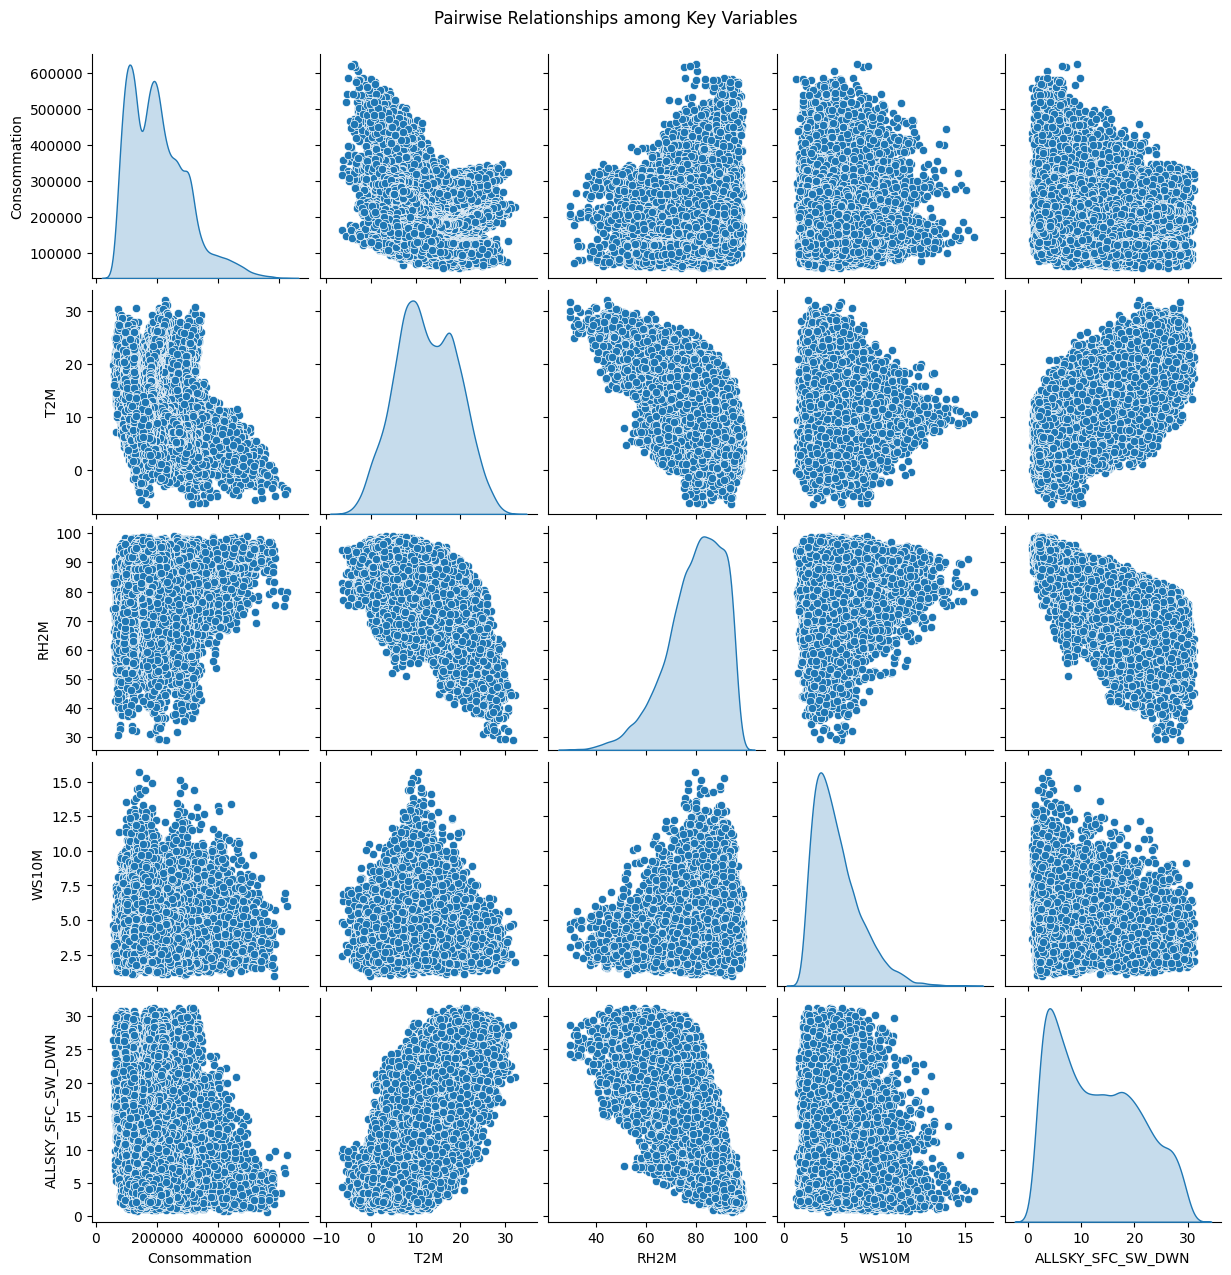

In [23]:
sns.pairplot(df[['Consommation', 'T2M', 'RH2M', 'WS10M', 'ALLSKY_SFC_SW_DWN']], diag_kind='kde')
plt.suptitle("Pairwise Relationships among Key Variables", y=1.02)
plt.show()

### Correlation heatmap

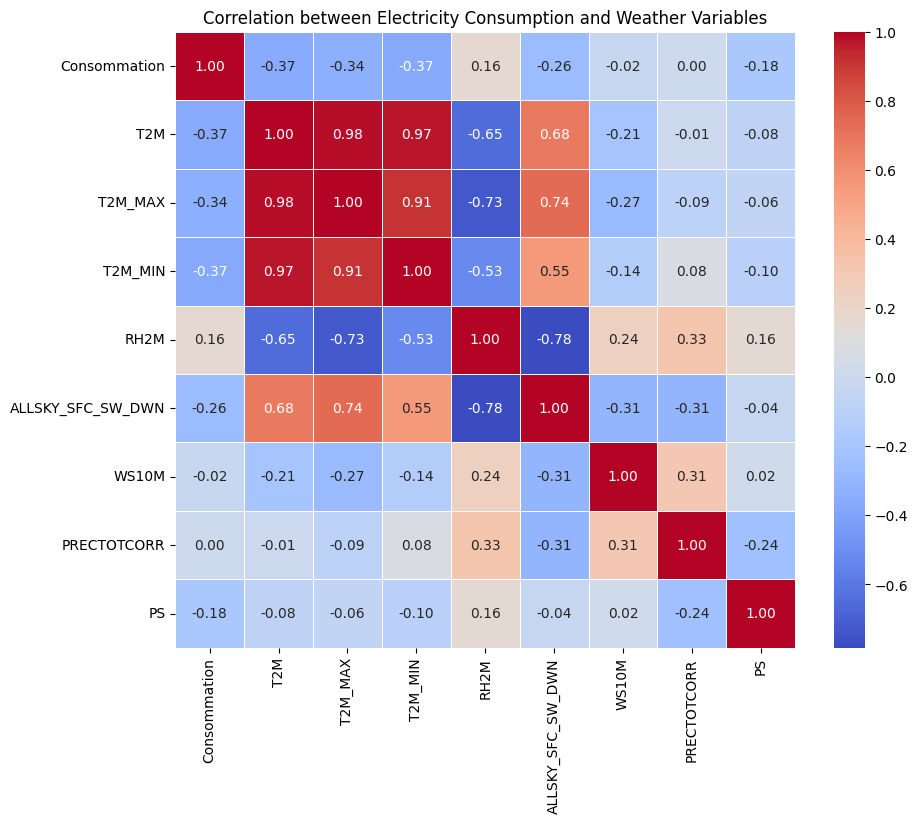

In [24]:
plt.figure(figsize=(10,8))
corr = df[['Consommation','T2M','T2M_MAX','T2M_MIN','RH2M','ALLSKY_SFC_SW_DWN','WS10M','PRECTOTCORR',"PS"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Electricity Consumption and Weather Variables")
plt.show()


# Model 

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Define target and features variables

#### We define the target Consommation and use meteorological inclueded calendar variables and the region as predictors.

In [ ]:
# Calendar features
df["month"] = df["Datetime"].dt.month
df["dayofweek"] = df["Datetime"].dt.dayofweek
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)
df["saison"] = df["month"] % 12 // 3 # 0=winter, 1 =spring, 2=summer, 3=autumn 
# Numerical features
num_features = [
    "ALLSKY_SFC_SW_DWN","CLRSKY_SFC_SW_DWN","GWETROOT","GWETTOP",
    "PRECTOTCORR","PS","QV2M","RH2M","T2M","T2M_MAX","T2M_MIN",
    "T2M_RANGE","WD10M","WS10M","WS2M",
    "month","dayofweek","is_weekend","saison"
]
# Categorical feature 
cat_features = ["Regions"]

# Target 
target = "Consommation"

## Train / Test split and ## Preprocessing: Normalization and Column Transformer

### Instead of random split, we respect time: train on 2020–2023, test on 2024.

In [39]:
# Train dataset on 2020-2023
train = df[df["year"] < 2024].copy()
# Test dataset on 2024
test  = df[df["year"] == 2024].copy()
# Define target/Variable train or test
X_train = train[num_features + cat_features]
y_train = train[target]
X_test  = test[num_features + cat_features]
y_test  = test[target]
print(f"Uniquness row of train dataset year:{train["year"].unique()}")
print(f"Uniquess row of test dataset year {test["year"].unique()}")


Uniquness of train dataset year:[2020 2021 2022 2023]
Uniquess of test dataset year [2024]


In [50]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features), # scale numerical
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)  # one-hot encode Regions
    ]
)

In [ ]:
feature_selector = SelectKBest(score_func=f_regression, k="all") 

## Pipeline Model

In [53]:
def pipeline(model):
    """
    Input 
    -----
    model
    """
    return Pipeline(steps=[
        ("preprocess", preprocess),
        ("select", feature_selector),
        ("model", model),
    ])

### 1. Model - Linear Regression

In [58]:
# Build pipeline
lin_model = pipeline(LinearRegression())
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Evaluation
lin_rmse = mean_squared_error(y_test, y_pred_lin)
lin_mae = mean_absolute_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression RMSE:", lin_rmse)
print("Linear Regression MAE :", lin_mae)
print("Linear Regression R-square  :", lin_r2)

Linear Regression RMSE: 468439085.6263876
Linear Regression MAE : 16062.43039587608
Linear Regression R-square  : 0.9435654671668716


### 2. Model - Ridge regression

In [73]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = pipeline(Ridge(alpha = 1))
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluating Ridge Regression
ridge_rmse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge regression RMSE:",ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)
print("Ridge Regression R-square:", ridge_r2)

Ridge regression RMSE: 468106030.146792
Ridge Regression MAE: 16051.707064042295
Ridge Regression R-square: 0.9436055915522511


### 3. Model - Decision Tree

In [ ]:
#Build pipeline
tree_pipe = pipeline(
    DecisionTreeRegressor(
        max_depth=4,       
        random_state=0
    )
)
tree_pipe.fit(X_train, y_train)
y_pred_tree = tree_pipe.predict(X_test)
# Evaluation
tree_rmse = mean_squared_error(y_test, y_pred_tree)
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree RMSE:", tree_rmse)
print("Decision Tree MAE :", tree_mae)
print("Decision Tree R-sqaure  :", tree_r2)


Decision Tree RMSE: 2418288135.5522976
Decision Tree MAE : 40576.71116273138
Decision Tree R-sqaure  : 0.7086601750934185


In [67]:

results = pd.DataFrame([
    {"Model": "Linear Regression", "RMSE": lin_rmse, "MAE": lin_mae, "R2": lin_r2},
    {"Model": "Ridge Regression",     "RMSE": ridge_rmse, "MAE": ridge_mae, "R2": ridge_r2},
    {"Model": "Decision Tree",     "RMSE": tree_rmse, "MAE": tree_mae, "R2": tree_r2},
    
])

results


Model          RMSE           MAE        R2
0  Linear Regression  4.684391e+08  16062.430396  0.943565
1   Ridge Regression  4.681060e+08  16051.707064  0.943606
2      Decision Tree  2.418288e+09  40576.711163  0.708660

## Distribution plot

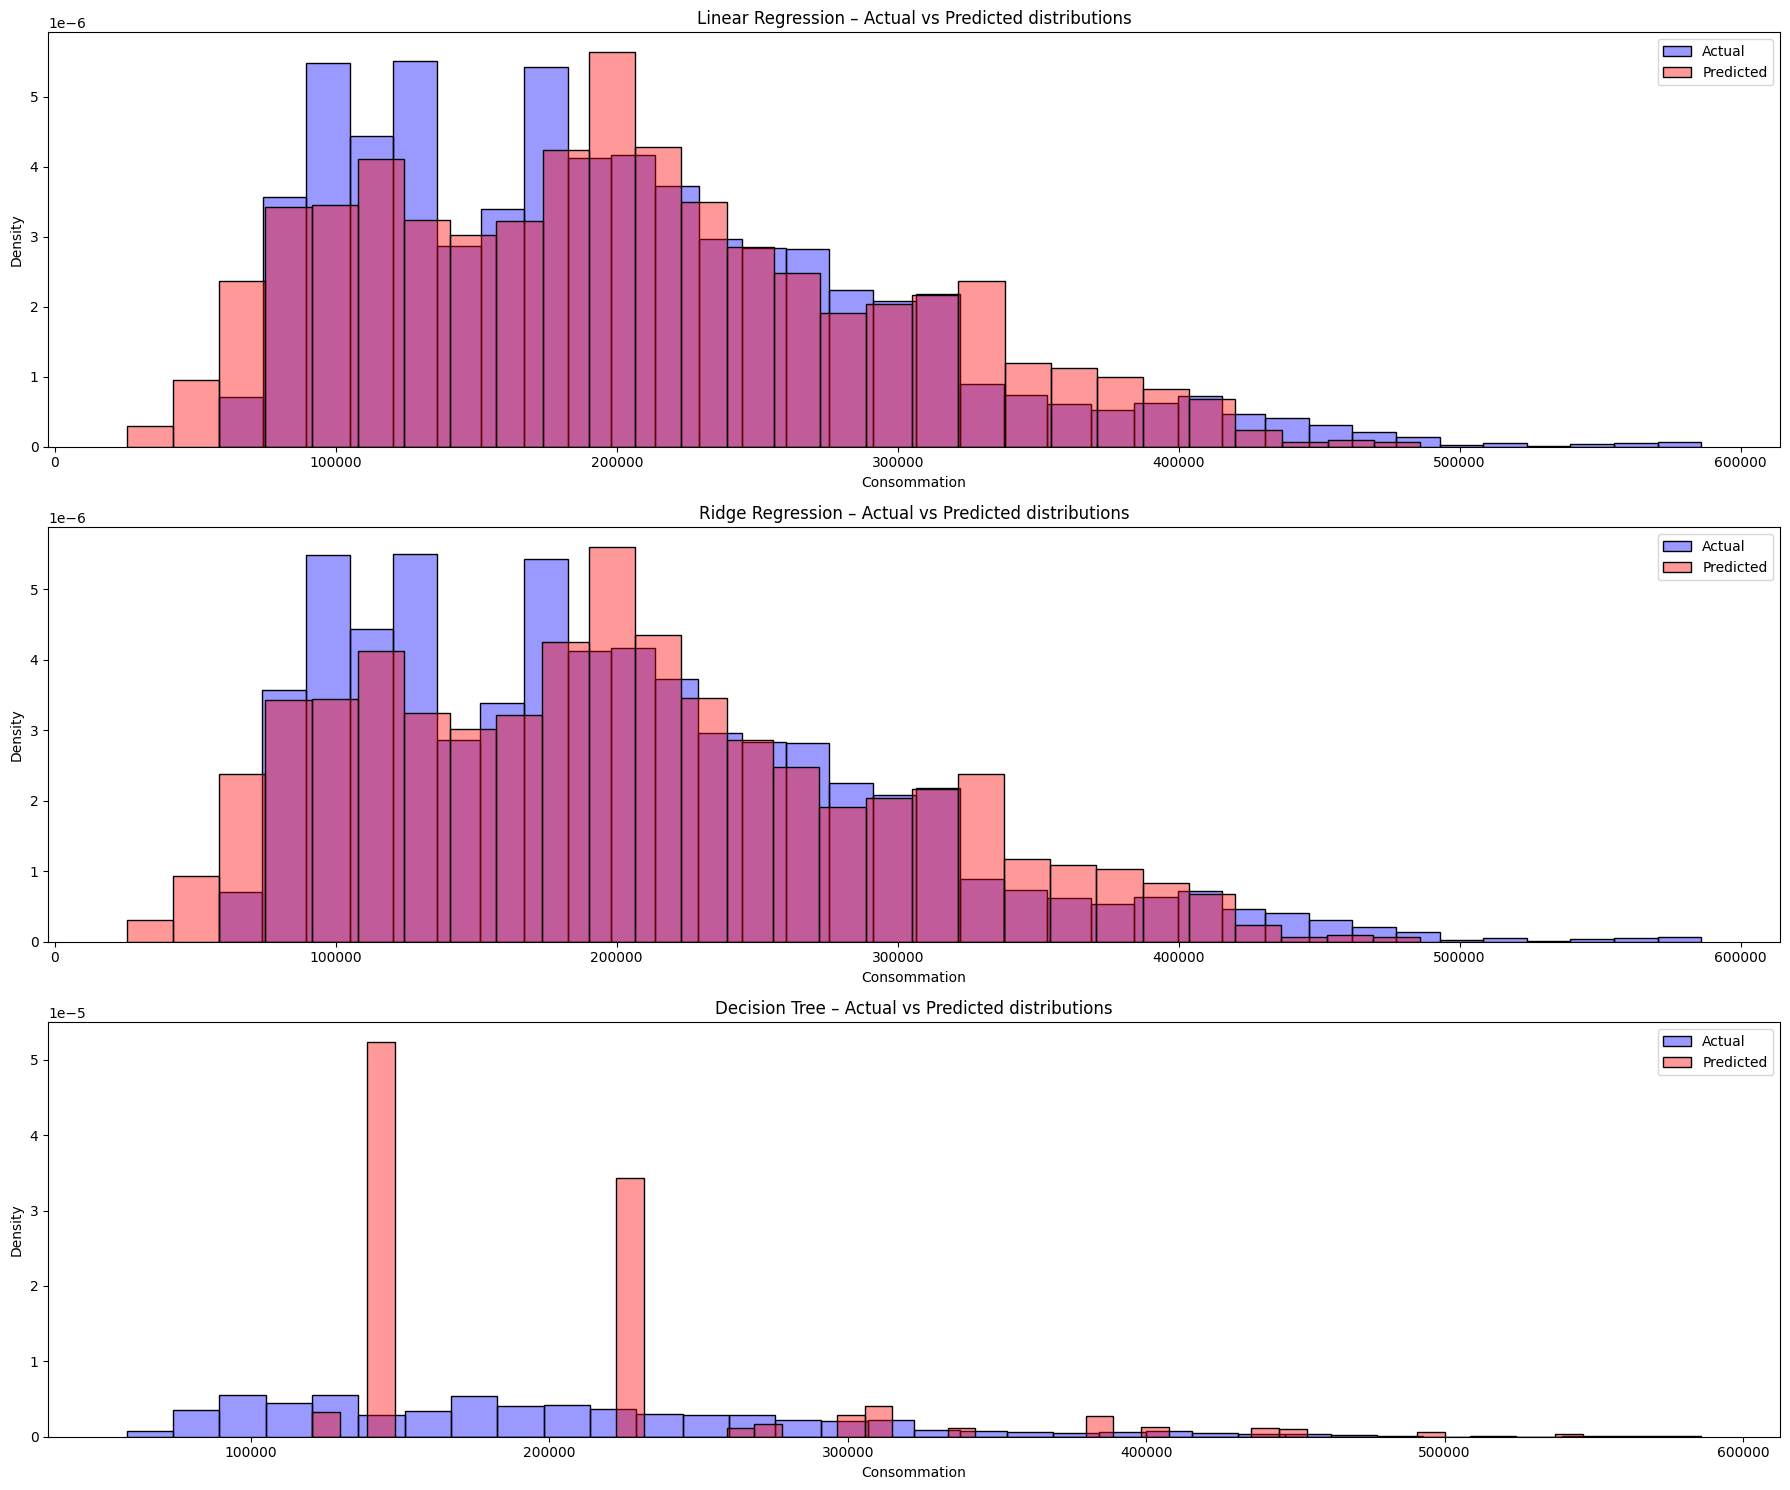

In [85]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15))

# Linear Regression
sns.histplot(y_test, ax=ax[0],stat = 'density', color="blue", alpha=0.4, label="Actual")
sns.histplot(y_pred_lin, ax=ax[0],stat ='density', color="red", alpha=0.4, label="Predicted")
ax[0].set_title("Linear Regression – Actual vs Predicted distributions")
ax[0].legend()

# Ridge Regression
sns.histplot(y_test, ax=ax[1], stat="density", color="blue", alpha=0.4, label="Actual")
sns.histplot(ridge_predictions, ax=ax[1], stat="density", color="red", alpha=0.4, label="Predicted")
ax[1].set_title("Ridge Regression – Actual vs Predicted distributions")
ax[1].legend()

# Decision Tree
sns.histplot(y_test, ax=ax[2], stat="density", color="blue", alpha=0.4, label="Actual")
sns.histplot(y_pred_tree, ax=ax[2], stat="density", color="red", alpha=0.4, label="Predicted")
ax[2].set_title("Decision Tree – Actual vs Predicted distributions")
ax[2].legend()

plt.tight_layout()


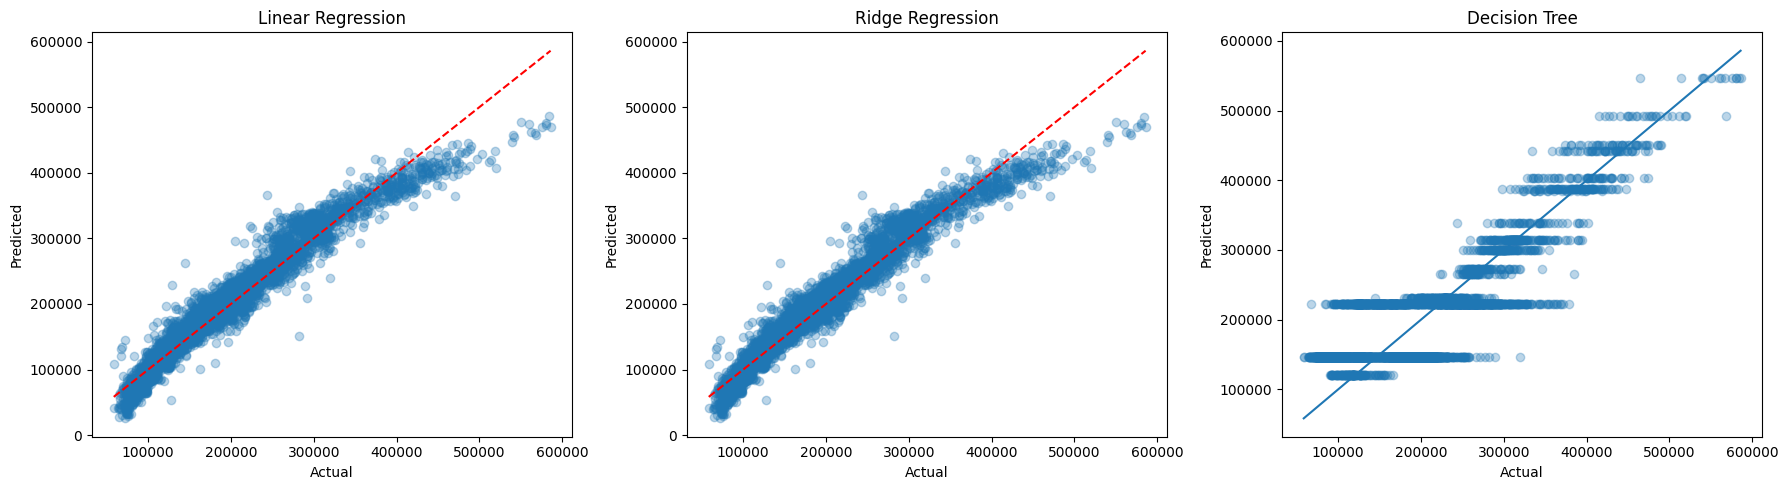

In [89]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Linear
ax[0].scatter(y_test, y_pred_lin, alpha=0.3)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
ax[0].set_title("Linear Regression")
ax[0].set_xlabel("Actual")
ax[0].set_ylabel("Predicted")

# Ridge
ax[1].scatter(y_test, ridge_predictions, alpha=0.3)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
ax[1].set_title("Ridge Regression")
ax[1].set_xlabel("Actual")
ax[1].set_ylabel("Predicted")

# Tree
ax[2].scatter(y_test, y_pred_tree, alpha=0.3)
ax[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
ax[2].set_title("Decision Tree")
ax[2].set_xlabel("Actual")
ax[2].set_ylabel("Predicted")

plt.tight_layout()


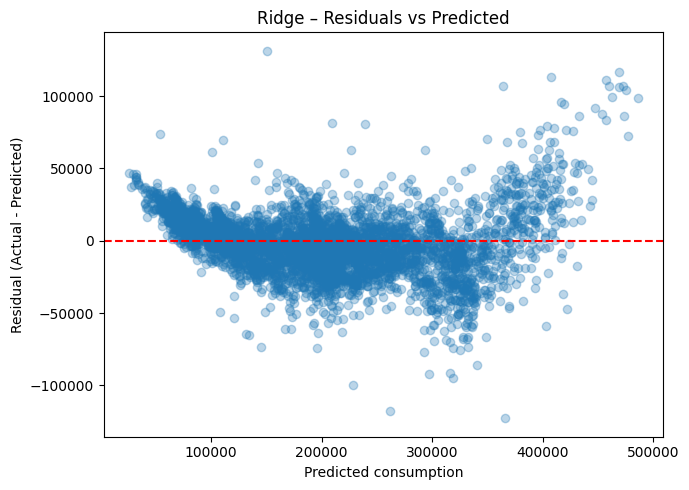

In [90]:
plt.figure(figsize=(7,5))
plt.scatter(ridge_predictions, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted consumption")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Ridge – Residuals vs Predicted")
plt.tight_layout()


In [ ]:
new_day = pd.DataFrame([{
    "ALLSKY_SFC_SW_DWN": 150,
    "CLRSKY_SFC_SW_DWN": 160,
    "GWETROOT": 0.6,
    "GWETTOP": 0.5,
    "PRECTOTCORR": 0.0,
    "PS": 1015,
    "QV2M": 0.007,
    "RH2M": 70,
    "T2M": 4,
    "T2M_MAX": 6,
    "T2M_MIN": 2,
    "T2M_RANGE": 4,
    "WD10M": 200,
    "WS10M": 3,
    "WS2M": 2.5,
    "month": 1,
    "dayofweek": 2,  #wednesday
    "is_weekend": 0, # No
    "saison": 0,      # Winter
    "Regions": "Île-de-France"
}])

predicted = ridge_model.predict(new_day)
print("Predicted consumption (MWh):", predicted_cons[0])


Predicted consumption (MWh): 584515.4278338236
